In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# import data
df = pd.read_csv("/content/drive/MyDrive/Current Topic CS/sensors.csv")
# df.describe() # Check data statistical details
# df.info() # Check data types
df.tail() # See the data

,timestamp,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,location,status
495,2019-05-13T16:00:00Z,-0.4329,0.0900,-1.0533,-0.9113,-1.2693,-0.7192,-0.2549,-1.9679,2.7985,-0.9689,NaN,building1,active
496,2019-05-14T16:00:00Z,-0.1244,-1.4677,-0.2950,-0.9557,-1.2083,-1.4306,-0.8063,-1.9760,3.1146,NaN,NaN,building6,active
497,2019-05-15T16:00:00Z,-1.8621,-0.3407,-1.1563,-1.3539,-0.7183,0.1211,-1.1645,-1.9840,3.6178,-1.2632,NaN,building1,active
498,2019-05-16T16:00:00Z,-1.1821,-1.1297,-1.1911,-0.4663,-0.3756,-0.5177,-0.9833,-1.9920,2.7687,-0.2342,NaN,building1,passive
499,2019-05-17T16:00:00Z,-0.4085,-0.2425,-0.6587,-0.9113,-0.5809,-1.6779,-0.1961,-2.0000,2.7467,-1.9619,0.4332,building1,active


In [20]:

len(df)

500

In [7]:
# Check for null values
df.isna().sum()

,0
timestamp,0
sensor1,0
sensor2,0
sensor3,0
sensor4,0
sensor5,0
sensor6,0
sensor7,0
sensor8,0
sensor9,0


In [9]:
# Convert timestamp to date time data
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [12]:
# Drop sensor11
df.drop("sensor11", axis = 1, inplace= True)

In [33]:
# Check the outliers by specifing bins
df[['sensor10']].apply(pd.Series.value_counts, bins = [-60,-5,0,5,110])

,sensor10
"(0.0, 5.0]",281
"(-5.0, 0.0]",193
"(-60.001, -5.0]",3
"(5.0, 110.0]",1


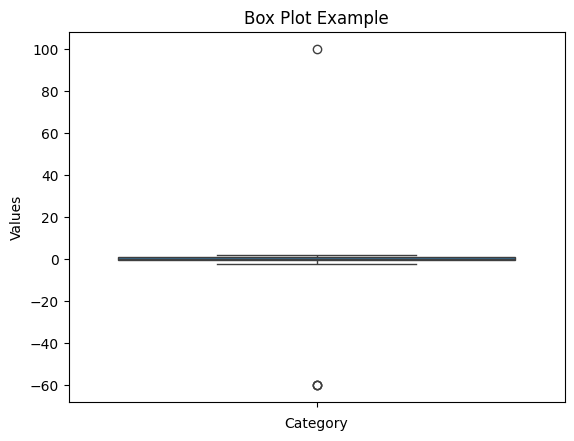

In [18]:
# Visualize outliers
# Draw a box plot
sns.boxplot( y='sensor10', data=df)

# Customize the plot
plt.title("Box Plot Example")
plt.xlabel("Category")
plt.ylabel("Values")
plt.show()

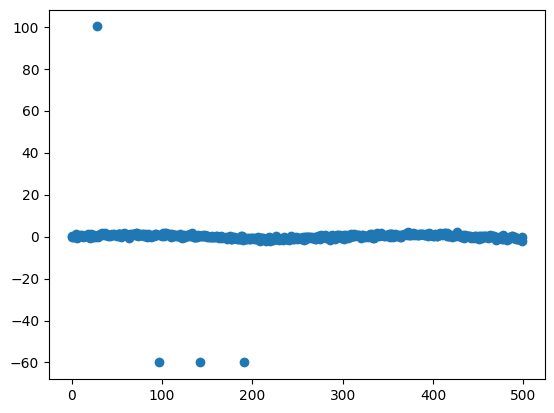

In [29]:
# Visualize the outlier using scatter plot
plt.scatter(df.index, df['sensor10'])
plt.show()

In [49]:
# Find all outliers indexes method 1
index_outlier = []
for i in range(len(df)):
    if df['sensor10'].iloc[i] >= 100 or df['sensor10'].iloc[i] <= -60:
        index_outlier.append(i)

print(index_outlier)

[28, 97, 142, 191]


In [51]:
# Find all outliers indexes and remove those values method 2
df = df[~((df['sensor10'] >= 100) | (df['sensor10'] <= -60))]

# Classification

In [56]:
# Import data
df = pd.read_csv("/content/drive/MyDrive/Current Topic CS/hr_data.csv")
df

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2,157,3,0,1,0,sales,low,31
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8
3,0.72,0.87,5,223,5,0,1,0,sales,low,68
4,0.37,0.52,2,159,3,0,1,0,sales,low,48
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,49
14995,0.37,0.48,2,160,3,0,1,0,support,low,3
14996,0.37,0.53,2,143,3,0,1,0,support,low,5
14997,0.11,0.96,6,280,4,0,1,0,support,low,78


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         14999 non-null  float64
 1   Last Evaluation            14999 non-null  float64
 2   Number of Projects         14999 non-null  int64  
 3   Monthly Hours              14999 non-null  int64  
 4   Total Time at the Company  14999 non-null  int64  
 5   Work Accidents             14999 non-null  int64  
 6   Quit the Company           14999 non-null  int64  
 7   Promoted in Last 5 yrs     14999 non-null  int64  
 8   Departments                14999 non-null  int8   
 9   salary                     14999 non-null  int8   
 10  Management                 14999 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 1.1 MB


In [71]:
# Convert Departments and salary to numbers be encoding the category
df['Departments '] = df['Departments '].astype('category').cat.codes
df['salary'] = df['salary'].astype('category').cat.codes

In [75]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and Target variables
X = df.drop(['Quit the Company'], axis=1)  # Features
y = df['Quit the Company']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9966666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2294
           1       0.99      0.99      0.99       706

    accuracy                           1.00      3000
   macro avg       0.99      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

